# Lecture 30: Tabu Search

---

## Overview

Unlike the Hill Climb algorithm, the Tabu Search algorithm navigates the solution space while avoiding local optima traps. To do so, the algorithm utilises a tabu list – $s_T$, that keeps a track of recently visited solutions, and an acceptance list – $s_A$, that stores certain desirable solutions. The algorithm initialises them as empty lists, while the current and the best solution – $s,s^*$, are set to the initial solution – $s_o$. Hereafter, in each iteration, the algorithm generates a set of k random candidate solutions – $s'$, from the neighbourhood of the current solution – $N(s)$, based on the solution transformations defined by the neighbourhood. From these neighbourhood solutions, the algorithm selects the candidate solution with the least objective function value – $f$, that satisfies the tabu and acceptance criterion, and sets it as the current solution. In addition, if this current solution is better than the best solution, then the algorithm updates the best solution as well. After this, the Tabu Search algorithm adds the current solution to the tabu list to prevent the search from cycling back to this solution. However, to avoid the list from growing indefinitely, the algorithm may remove the oldest solution from the list, maintaining a size of a maximum of m solutions. Hence, the tabu list behaves like a short-term memory of recently visited solutions that the algorithm needs to avoid. Nonetheless, certain previously visited solutions maybe desirable due to their proximity to the best solution, and hence allowed to recycle through the iterations. To this end, the algorithm adds the current solution to the acceptance list if it is within p-proximity of the best solution. This enables the algorithm to overrule the tabu criterion when updating the current solution (refer to Line 8-9). This iterative process continues until the algorithm meets the convergence conditions pertaining to computation effort or solution quality, returning the best solution in the end.

Note, unlike the exclusively exploitative Hill Climb algorithm, the Tabu Search algorithm balances exploration and exploitation of the solution landscape. It does so by keeping a track of recently visited solutions to avoid, thus forcing domain space exploration (diversification), while storing desirable solutions to recycle, thus enabling exploitation (intensification). Nonetheless, the exploration-exploitation balance is contingent on input parameters, namely, number of candidate solutions $k$, size of the tabu list $m$, and proximity parameter $p$. Thus, effective use of the Tabu Search algorithm requires sophisticated parameter fine-tuning for practical applications.

Nonetheless, due to the ability of the Tabu Search alogirhm to effectively escape local optima traps, it has been extensively deployed for optimisation in Transportation Engineering, especially in routing-based problems such as the vehicle routing problem or the dial-a-ride problem.

---

## Pseudo Code

1. **Procedure** $\text{TS}(s_o, (N, k, m, p))$
2. $s ← s_o$ &emsp;<small>// initialise current solution $s$ as the initial solution $s_o$</small>
3. $s^* ← s$ &emsp;<small>// initialise best solution $s^*$ as the current solution</small>
4. $s_T ← \{\}$ &emsp;<small>// initialise tabu list $s_T$</small>
5. $s_A ← \{\}$ &emsp;<small>// initialise acceptance list $s_A$</small>
6. **while** $!\text{converged}$ **do** &emsp;<small>// repeat until converged</small>
7. &emsp;$s' {R \atop ←} \{s'; s' ∈ N(s)\}_k$ &emsp;<small>// generate $k$ random candidates from neighborhood $N$ of the current solution</small>
8. &emsp;$s' ← \text{argmin} \{f(s); s ∈ s', s ∉ s_T \cup s_A\}$ &emsp;<small>// set new solution to the best feasible candidate solution</small>
9. &emsp;$s ← s'$ &emsp;<small>// update the current solution to the new solution</small>
10. &emsp;**if** $f(s) < f(s^*)$ **then** &emsp;<small>// if the current solution is better than the best solution</small>
11. &emsp;&emsp;$s^* ← s$ &emsp;<small>// update the best solution to the current solution</small>
12. &emsp;**end if**
13. &emsp;$s_T ← s_T \cup \{s\}$ &emsp;<small>// add the current solution to the tabu list</small>
14. &emsp;**if** $||s_T|| > m$ **then** &emsp;<small>// if size of the tabu list is greater than the maximum size $m$</small>
15. &emsp;&emsp;$\text{pop}(s_T)$ &emsp;<small>// remove the oldest solution from the tabu list</small>
16. &emsp;**end if**
17. &emsp;**if** $f(s) < (1 + p)f(s^*)$ **then** &emsp;<small>// if the current solution satisfies acceptance criterion $p$</small>
18. &emsp;&emsp;$s_A ← s_A \cup \{s'\}$ &emsp;<small>// add the solution to the acceptance list</small>
19. &emsp;**end if**
20. **end while**
21. **return** $s^*$ &emsp;<small>// return the best solution</small>

---

## Implementation

In [312]:
import random
import numpy as np
import matplotlib.pyplot as plt

def ts(s_o, N, k, m, p, n=100, t=1e-5):
    """
    Tabu Search Algorithm
    
    Parameters:
    - s_o: Initial solution
    - N: Neighborhood function
    - k: Number of candidate neighbors per iteration
    - m: Maximum size of tabu list
    - p: Acceptance criterion percentage
    - n: number of iterations
    - t: convergence threshold
    
    Returns:
    - Best solution in each iteration
    """
    s   = s_o     # Current solution
    s_b = s       # Best solution found
    S   = [s_b]   # Track best solutions over iterations
    
    S_t = []      # Tabu list
    S_a = []      # Acceptance list

    i = 1
    e = 1
    converged = False
    while not converged:
        S_n = [N(s) for _ in range(k)]                                    # Generate k random neighbors
        S_n = [s_n for s_n in S_n if s_n not in S_t + S_a]                # Filter tabu and accepted solutions
        s_n = S_n[np.argmin([f(s_n) for s_n in S_n])]                     # Select best neighbour
        
        s = s_n                                                           # Update current solution
        
        if f(s) < f(s_b):                                                 # If better than best found so far, update
            e   = f(s_b) - f(s)
            s_b = s
            
        S_t.append(s)                                                     # Add current solution to tabu list

        if len(S_t) > m:                                                  # Maintain tabu list size
            S_t.pop(0)
        
        if f(s) < (1 + p) * f(s_b):                                       # Acceptance condition
            S_a.append(s)
        
        S.append(s_b)                                                     # Store the best solution at each iteration

        i += 1
        if i >= n or e <= t:                                              # Convergence condition
          converged = True
    
    return S


---

## Case Study

### Ackley Function

Text(0.5, 0.92, 'Ackley Function Surface Plot')

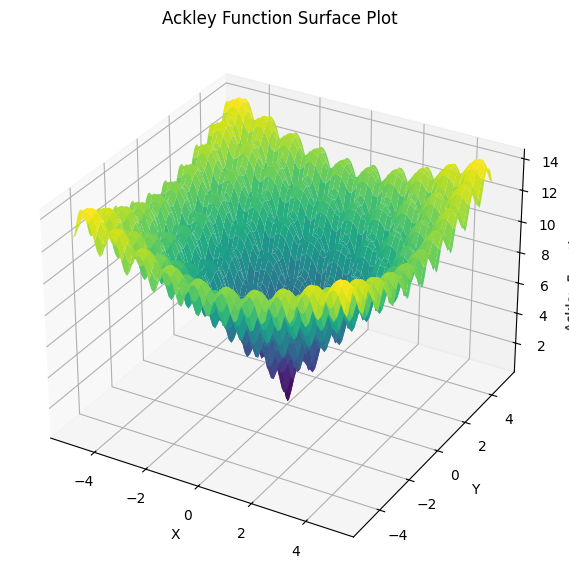

In [313]:
def f(s):
    """
    Computes the Ackley function for given solution s.

    Parameters:
    - s: Tuple of input coordinates

    Returns:
    - Function value at s
    """
    x, y = s
    return -20 * np.exp(-0.2 * np.sqrt((x**2 + y**2) / 2)) + -np.exp((np.cos(2 * np.pi * x) + np.cos(2 * np.pi * y)) / 2) + 20 + np.exp(1)

# Generate a grid of (x, y) values
X, Y = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))
Z = np.array([[f(s) for s in zip(r, c)] for r, c in zip(X, Y)])

# Plot the Ackley function
fig = plt.figure(figsize=(7, 7))
ax  = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')

# Labels and title
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Ackley Function Value")
ax.set_title("Ackley Function Surface Plot")


Best solution: [0.003971176935010368, 0.006716835512229569]
Objective function value: 0.023690703349150244


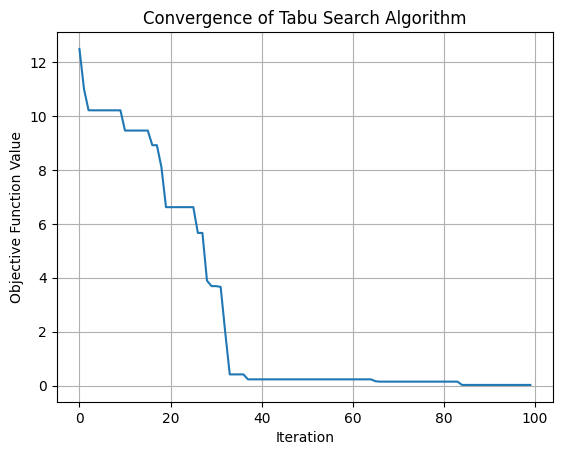

In [324]:
def N(s):
    x, y = s
    x += np.random.uniform(-0.5, 0.5)
    y += np.random.uniform(-0.5, 0.5)
    s = [x,y]
    return s

s_o = [random.uniform(-5, 5), random.uniform(-5, 5)]
S   = ts(s_o, N, 10, 5, 0.1)
s_b = S[-1]
F   = [f(s) for s in S]

# Report outcome
print("Best solution:", s_b)
print("Objective function value:", f(s_b))

# Convergence plot
fig = plt.figure()
plt.plot(F)
plt.xlabel("Iteration")
plt.ylabel("Objective Function Value")
plt.title("Convergence of Tabu Search Algorithm")
plt.grid()
plt.show()

---

### Traveling Salesman Problem

Best solution: [1, 8, 9, 38, 31, 44, 18, 7, 28, 6, 37, 19, 27, 17, 43, 30, 36, 46, 33, 15, 40, 12, 20, 47, 11, 13, 21, 39, 32, 24, 45, 35, 4, 26, 10, 42, 2, 29, 5, 48, 25, 14, 23, 3, 34, 41, 16, 22]
Objective function value: 10906


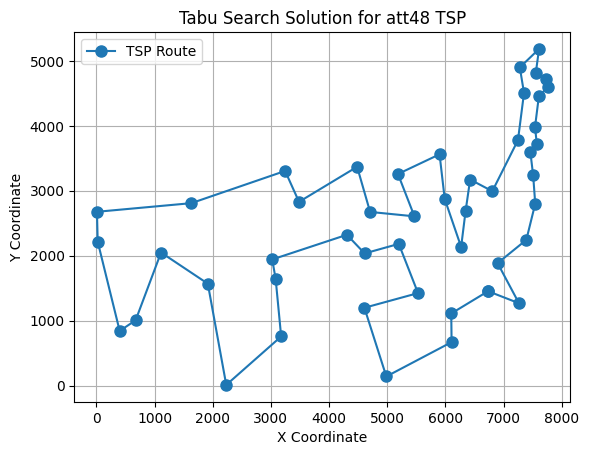

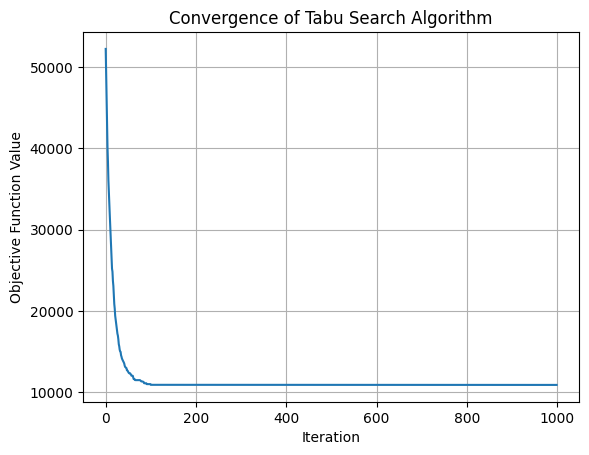

In [400]:
import pandas as pd
import random
import matplotlib.pyplot as plt

# Load ATT48 dataset from CSV files
nodes = "https://raw.githubusercontent.com/anmpahwa/CE5972/refs/heads/embargo/resources/att48_nodes.csv"
arcs  = "https://raw.githubusercontent.com/anmpahwa/CE5972/refs/heads/embargo/resources/att48_arcs.csv"

# Read CSV files
nodes = pd.read_csv(nodes)
arcs = pd.read_csv(arcs, index_col=0)

# Ensure correct type and indexing
arcs.index   = arcs.index.astype(int)
arcs.columns = arcs.columns.astype(int)

# Compute total route cost
def f(s):
    c = L[(s[-1], s[0])]
          
    for i in range(len(s)-1):
      c += L[(s[i], s[i+1])]
    
    return c

# Generate 2-opt neighborhood
def N(s):
    """Performs a 2-opt swap by reversing the path segment between indices i and j."""
    i, j = sorted(random.sample(range(len(C)), 2))
    s    = s[:i] + s[i:j+1][::-1] + s[j+1:]
    return s

s_o = random.sample(C, len(C))
S   = ts(s_o, N, 100, 75, 0.1, 1000, 1e-5)
s_b = S[-1]
F   = [f(s) for s in S]

s = s_b
coords = {c: problem.node_coords[c] for c in s}
x = [coords[c][0] for c in s] + [coords[s[0]][0]]
y = [coords[c][1] for c in s] + [coords[s[0]][1]]

# Report outcome
print("Best solution:", s_b)
print("Objective function value:", f(s_b))

# TSP
plt.figure()
plt.plot(x, y, 'o-', markersize=8, label="TSP Route")
plt.title("Tabu Search Solution for att48 TSP")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.legend()
plt.grid()
plt.show()

# Convergence plot
fig = plt.figure()
plt.plot(F)
plt.xlabel("Iteration")
plt.ylabel("Objective Function Value")
plt.title("Convergence of Tabu Search Algorithm")
plt.grid()
plt.show()


In [ ]:

# Compute total route cost
def f(s):
    c = L[(s[-1], s[0])]
          
    for i in range(len(s)-1):
      c += L[(s[i], s[i+1])]
    
    return c

# Generate 2-opt neighborhood
def N(s):
    """Performs a 2-opt swap by reversing the path segment between indices i and j."""
    i, j = sorted(random.sample(range(len(C)), 2))
    s    = s[:i] + s[i:j+1][::-1] + s[j+1:]
    return s

s_o = random.sample(C, len(C))
S   = ts(s_o, N, 100, 75, 0.1, 1000, 1e-5)
s_b = S[-1]
F   = [f(s) for s in S]

s = s_b
coords = {c: problem.node_coords[c] for c in s}
x = [coords[c][0] for c in s] + [coords[s[0]][0]]
y = [coords[c][1] for c in s] + [coords[s[0]][1]]

# Report outcome
print("Best solution:", s_b)
print("Objective function value:", f(s_b))

# TSP
plt.figure()
plt.plot(x, y, 'o-', markersize=8, label="TSP Route")
plt.title("Tabu Search Solution for att48 TSP")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.legend()
plt.grid()
plt.show()

# Convergence plot
fig = plt.figure()
plt.plot(F)
plt.xlabel("Iteration")
plt.ylabel("Objective Function Value")
plt.title("Convergence of Tabu Search Algorithm")
plt.grid()
plt.show()